In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
RANDOM_STATE = 42

In [12]:
dataset1 = 'Small_Datasets/2-wayEpi_100feat.txt'
dataset2 = 'Small_Datasets/4-wayAdditive_100feat.txt'
dataset3 = 'Small_Datasets/2Additive_2-wayEpi_100feat.txt'
dataset4 = 'Small_Datasets/4-wayHeterogeneous_100feat.txt'
df = pd.read_csv(dataset2, sep='\t', )

In [13]:
df.head()

,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,...,N91,N92,N93,N94,N95,M0P1,M1P2,M2P3,M3P4,Class
0,0,1,2,1,1,0,1,0,1,0,...,1,0,0,1,0,1,0,2,0,1
1,0,0,2,1,1,0,0,0,1,1,...,2,1,1,1,2,0,1,1,2,1
2,0,1,0,1,0,0,0,2,0,0,...,0,1,1,1,1,2,0,2,0,1
3,0,1,0,1,2,1,1,2,1,1,...,1,0,0,2,1,0,1,2,1,1
4,0,0,2,0,1,0,0,1,0,0,...,0,1,0,1,1,0,1,2,1,1


In [14]:
# Create new dataframe with only the features M0P1 and Class
df[['M0P1', 'M1P2', 'M2P3', 'M3P4', 'Class']].groupby(['M0P1', 'M1P2', 'M2P3', 'M3P4', 'Class']).value_counts()

M0P1  M1P2  M2P3  M3P4  Class
0     0     0     0     0         2
                        1         4
                  1     1         6
                  2     0         1
                        1        18
                                 ..
2     2     0     0     0        49
                  1     0        28
            1     0     0        28
                  1     0         9
            2     0     0         1
Name: count, Length: 84, dtype: int64

In [15]:
# print all the columns
df.columns

Index(['N0', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9',
       ...
       'N91', 'N92', 'N93', 'N94', 'N95', 'M0P1', 'M1P2', 'M2P3', 'M3P4',
       'Class'],
      dtype='object', length=101)

In [16]:
features = [feature for feature in df.columns if feature != 'Class']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(df[features], df['Class'], train_size=0.8, random_state=42)

In [18]:
x_train['N0']

29     0
535    0
695    1
557    0
836    1
      ..
106    0
270    0
860    1
435    1
102    0
Name: N0, Length: 800, dtype: int64

In [19]:
# # Train a decision tree model with 4 features from the dataset
# feature = 'M2P3'
# feature4 = 'M1P2'
# feature3 = 'M0P1'
# for feature2 in features:
#         if feature == feature2 or feature == feature3 or feature2 == feature3:
#                 continue
#         model = RandomForestClassifier(max_depth = 4, random_state = 42).fit(x_train[[feature, feature2, feature3, 'M1P2']],y_train)
#         prediction_train = model.predict(x_train[[feature, feature2, feature3, 'M1P2']])
#         # Find accuracy score
#         Accuracy_Score = accuracy_score(prediction_train, y_train)
#         if Accuracy_Score > 0.94:
#                 print(f"Feature trained: {feature}, {feature2}, {feature3}, Metrics train:\n\tAccuracy score: {Accuracy_Score:.4f}")
#                 #Print feature importance
#                 print(f"Feature importance: {model.feature_importances_}")

In [20]:
random_forest_model = RandomForestClassifier(n_estimators=50,
                                             max_depth=4, 
                                             min_samples_split=200,
                                             random_state=RANDOM_STATE).fit(x_train, y_train)
# Print feature importance
featureImportance = random_forest_model.feature_importances_
print(f"Feature importance:{featureImportance}")
# Print feature importance feature if feature importance is greater than 0.1
# for i in range(len(featureImportance)):
#     if featureImportance[i] > 0.1:
#         print(f"Feature importance: {featureImportance[i]:.4f} for feature: {features[i]}")

# Plot feature importance of top 10 features
# plt.figure()
# plt.title("Feature importances")
# plt.bar(range(10), featureImportance, align="center")
# plt.xticks(range(10), features, rotation=90)
# plt.xlim([-1, 10])
# plt.show()



Feature importance:[0.00000000e+00 2.31425812e-03 0.00000000e+00 4.83432596e-03
 3.93212129e-03 0.00000000e+00 1.14688317e-02 0.00000000e+00
 4.63832516e-04 6.51468808e-03 9.75000453e-04 0.00000000e+00
 0.00000000e+00 1.44900774e-02 1.46448395e-02 1.44219838e-03
 4.95584634e-03 0.00000000e+00 2.94829607e-04 1.21539599e-04
 0.00000000e+00 0.00000000e+00 2.94831710e-03 2.43144578e-02
 0.00000000e+00 1.68772311e-04 1.18265428e-02 2.82033483e-03
 0.00000000e+00 1.47097985e-02 7.21061839e-03 0.00000000e+00
 2.60062915e-04 4.28872527e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.69801280e-02
 7.27244441e-03 9.91404798e-04 0.00000000e+00 1.53492472e-03
 3.74472267e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.35379247e-02 1.44999857e-02 7.02631954e-03
 1.15034623e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.13560454e-04 7.85830554e-03 0.00000000e+00 0.00000000e+00
 1.14893135e-03 1.58155255e-03 0.00000000e+00 0.00000000e+00
 1.17

In [21]:
print(f"Training accuracy score: {accuracy_score(random_forest_model.predict(x_train),y_train):.4f}\nTesting accuracy score: {accuracy_score(random_forest_model.predict(x_test),y_test):.4f}")

Training accuracy score: 0.9500
Testing accuracy score: 0.8950


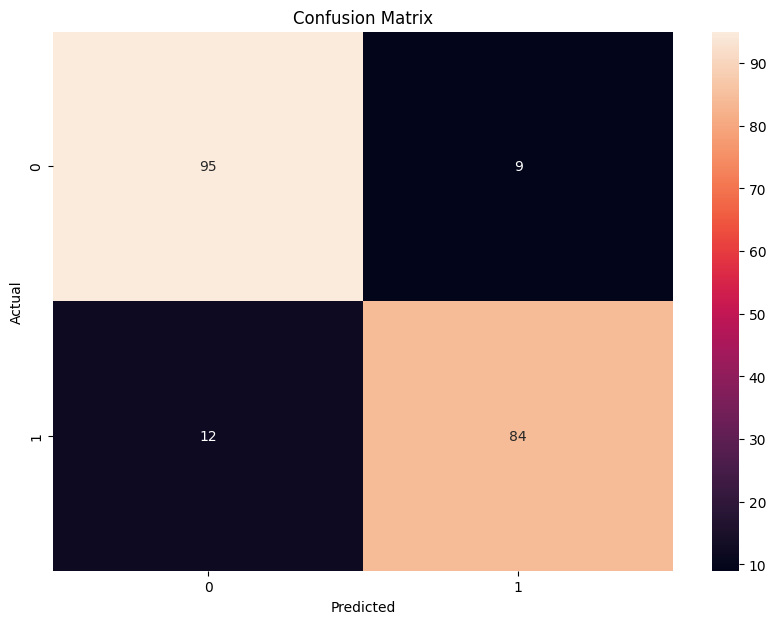

In [22]:
# draw confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, random_forest_model.predict(x_test))
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
